# Data Analyst Associate Practical Exam Submission

David Galera



# Task 1


**claim_id**: There were 2000 unique values. There were no missing values. No changes were made to this column.

**time_to_close**: There were 2000 positive discrete values. There were no missing values. No changes were made to this column.

**claim_amount**: There were no missing values. The data included the string indicating the currency of Brazil so the string was removed and the column was converted to float type.

**amount_paid**: There were 36 missing values, they were replaced with the median rounded to 2 decimal places as per the data description.

**location**: There were 4 unique categories, that match those in the description. There were no missing values and no changes were made to this column.

**individuals_on_claim**: All values are discrete and higher than 1. There were no missing values. No changes were made to this column.

**linked_cases**: All of the values in this column were either TRUE or FALSE. There were 26 missing values. All missing values were replaced with FALSE.

**cause**: There were 5 categories due to spelling errors. The categories 'VEGETABLES' and ' Meat' were replaced with 'vegetables' and 'meat', so the column ended with the categories that match those in the description. There were no missing values.

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
plt.style.use('ggplot')

In [22]:
df = pd.read_csv('food_claims_2212.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


In [23]:
df.claim_id.nunique()

2000

In [24]:
len(df.time_to_close>0)

2000

In [25]:
df.claim_amount.head()

0    R$ 74474.55
1    R$ 52137.83
2     R$ 24447.2
3    R$ 29006.28
4     R$ 19520.6
Name: claim_amount, dtype: object

In [26]:
df.claim_amount.nunique()

2000

In [27]:
df['claim_amount'] = df['claim_amount'].str.replace('R\$ ', '', regex=True)
df.claim_amount.head()

0    74474.55
1    52137.83
2     24447.2
3    29006.28
4     19520.6
Name: claim_amount, dtype: object

In [28]:
df['claim_amount']=df['claim_amount'].astype('float')
df['claim_amount'].head()

0    74474.55
1    52137.83
2    24447.20
3    29006.28
4    19520.60
Name: claim_amount, dtype: float64

In [29]:
df['amount_paid'].isna().sum()

36

In [30]:
df.loc[df['amount_paid'].isnull(),'amount_paid']=round(df['amount_paid'].median(),2)
df['amount_paid'].isna().sum()

0

In [31]:
df['location'].value_counts()

RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64

In [34]:
(df['individuals_on_claim']>0).sum()

2000

In [35]:
df['linked_cases'].value_counts()

False    1493
True      481
Name: linked_cases, dtype: int64

In [36]:
df.loc[df['linked_cases'].isnull(),'linked_cases']=False
df['linked_cases'].value_counts()

False    1519
True      481
Name: linked_cases, dtype: int64

In [38]:
df['cause'].value_counts()

meat          943
unknown       713
vegetable     314
VEGETABLES     16
 Meat          14
Name: cause, dtype: int64

In [40]:
df['cause'] = df['cause'].replace(['VEGETABLES',' Meat'], ['vegetable','meat'])
df['cause'].value_counts()

meat         957
unknown      713
vegetable    330
Name: cause, dtype: int64

# Task 2


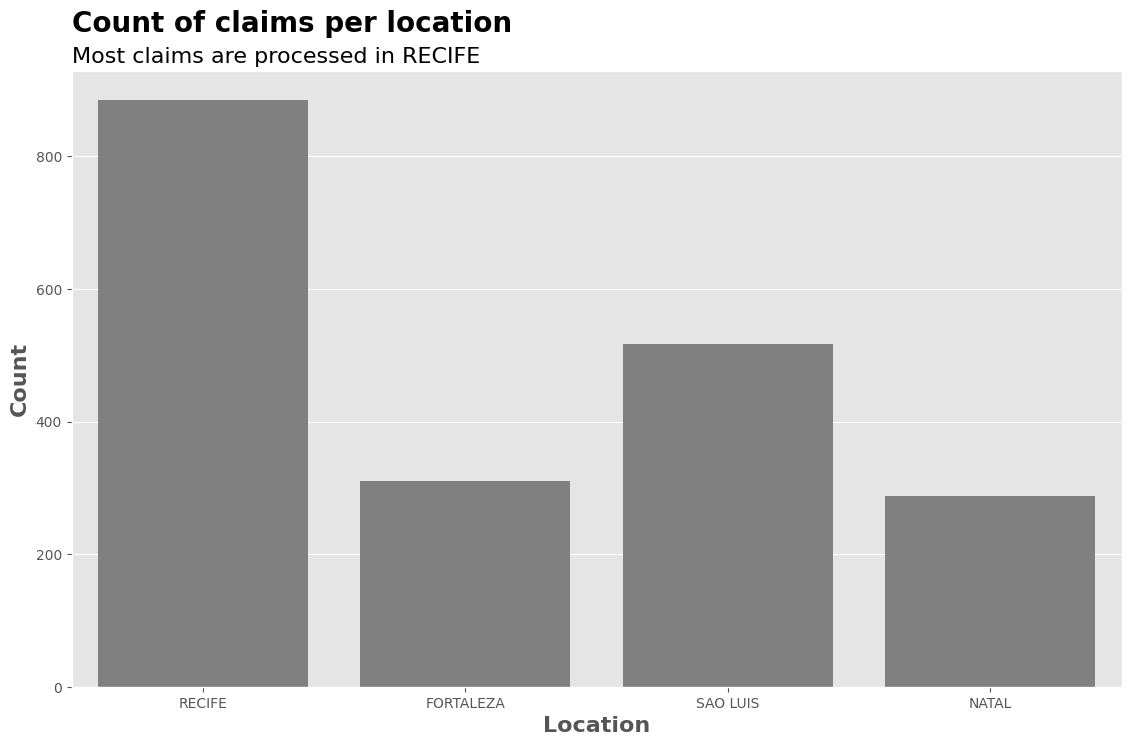

In [84]:
fig, axes = plt.subplots(figsize=(15,8))
sns.countplot(x=df['location'],ax=axes,color='gray')#.set(title='Count of claims per location')
plt.title('Count of claims per location', fontsize=20, fontweight='bold',y=1.05,loc='left')
#plt.suptitle('Most claims are processed in RECIFE', fontsize=16, y=0.91,ha='right')
#axes.set(xlabel='Location',fontsize=20, fontweight='bold')
plt.text(0.2, 0.89, 'Most claims are processed in RECIFE', fontsize=16, transform=plt.gcf().transFigure)
plt.xlabel('Location', fontweight='bold',fontsize=16)
plt.ylabel('Count', fontweight='bold',fontsize=16)
#plt.suptitle('Subtitle: Data Trends', fontsize=12)
plt.subplots_adjust(left=0.2)
plt.show();

There are 4 possible locations. Most of the claims are processed in RECIFE, followed by SAO LUIS with just over half of the claims processed by RECIFE. While NATAL or FORTALEZA process just over half of the claims processed by SAO LUIS. The categories are unbalanced, with most observations being either RECIFE or SAO LUIS. The team should focus on distributing their claims to all offices.

# Task 3

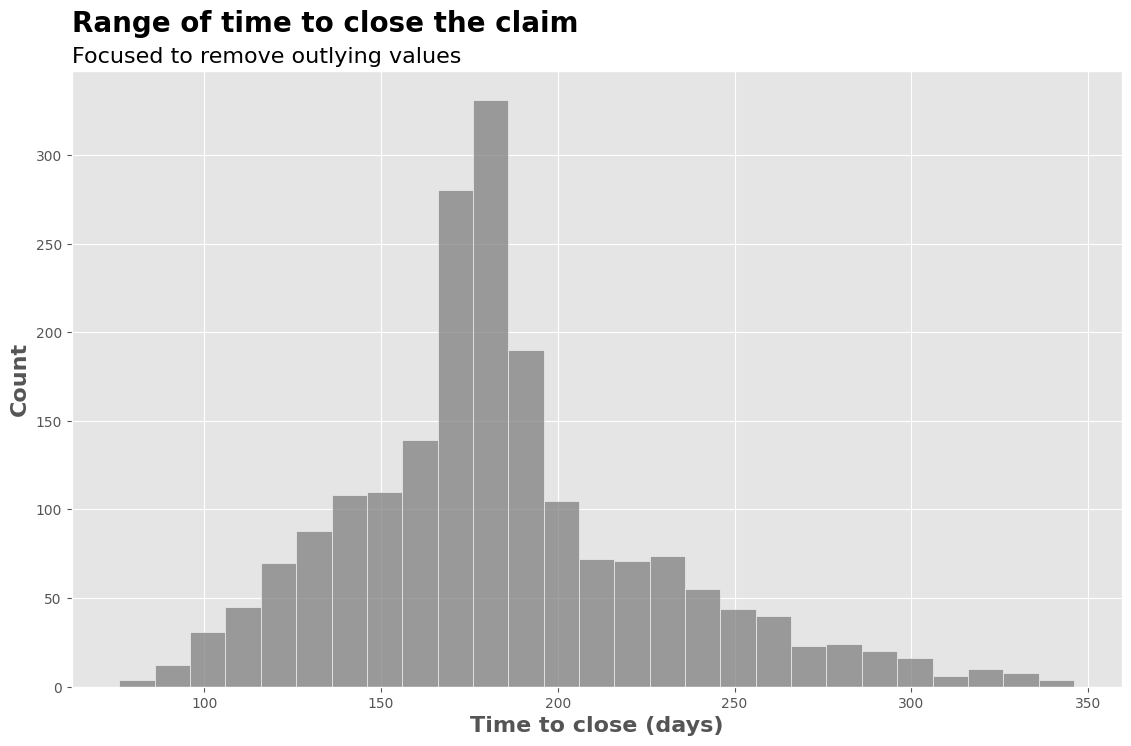

In [99]:
fig, axes = plt.subplots(figsize=(15,8))
sns.histplot(x=df[df['time_to_close']<350]['time_to_close'],ax=axes,color='gray', binwidth=10)#.set(title='Count of claims per location')
plt.title('Range of time to close the claim', fontsize=20, fontweight='bold',y=1.05,loc='left')
#plt.suptitle('Most claims are processed in RECIFE', fontsize=16, y=0.91,ha='right')
#axes.set(xlabel='Location',fontsize=20, fontweight='bold')
plt.text(0.2, 0.89, 'Focused to remove outlying values', fontsize=16, transform=plt.gcf().transFigure)
plt.xlabel('Time to close (days)', fontweight='bold',fontsize=16)
plt.ylabel('Count', fontweight='bold',fontsize=16)
#plt.suptitle('Subtitle: Data Trends', fontsize=12)
plt.subplots_adjust(left=0.2)
plt.show();

As the legal team wants to know how long it takes to reply to customers and close claims. We should look at how the time to close the claim is distributed. 

Looking at the time that took each claim to close. The distribution of the time to close the claim is approximately Gaussian with most claims lasting between 150 and 200 days. There are a small proportion of outliers, lasting more than 300 days.

When looking for an average value for the time to close a claim, the team should expect about 180 days.

# Task 4

Finally we want to combine the two pieces of information to see how the location impacts time to close the claim. So far, claims lasting 150-200 days before they get closed would be what we should expect, but we need to look at the two variables together to see if this is realistic.

When looking at the distribution of time to close the claims we excluded values above 350 days to better see the bell shape of the distribution. To show the impact, we can look at time to close by location including outliers. In the graphic below you can see that values above 300 days are dominating the data and making comparison difficult. To make it easier to compare the rest of the data, we will remove outliers.

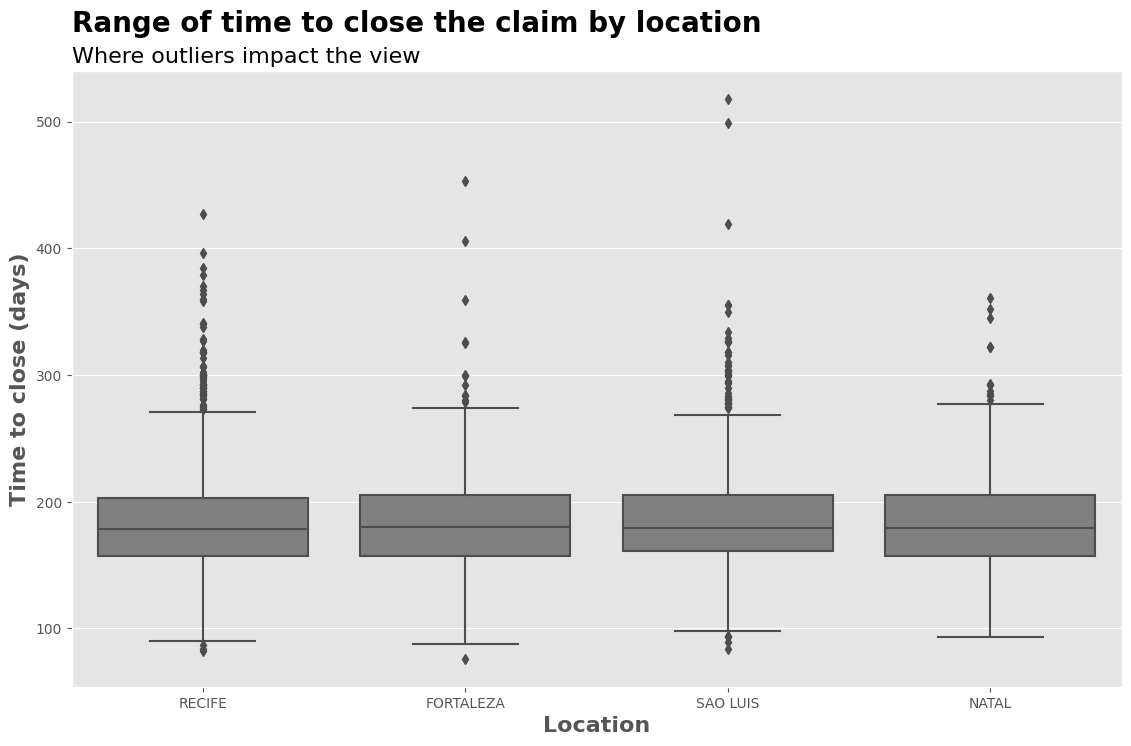

In [100]:
fig, axes = plt.subplots(figsize=(15,8))
sns.boxplot(x=df['location'],y=df['time_to_close'],ax=axes,color='gray')#.set(title='Count of claims per location')
plt.title('Range of time to close the claim by location', fontsize=20, fontweight='bold',y=1.05,loc='left')
#plt.suptitle('Most claims are processed in RECIFE', fontsize=16, y=0.91,ha='right')
#axes.set(xlabel='Location',fontsize=20, fontweight='bold')
plt.text(0.2, 0.89, 'Where outliers impact the view', fontsize=16, transform=plt.gcf().transFigure)
plt.xlabel('Location', fontweight='bold',fontsize=16)
plt.ylabel('Time to close (days)', fontweight='bold',fontsize=16)
#plt.suptitle('Subtitle: Data Trends', fontsize=12)
plt.subplots_adjust(left=0.2)
plt.show();

After removing outliers we can focus on the main range of data. Although RECIFE and SAO LUIS do include much more claims that take longer to close, their interquartile range of the time to close the claims is slighly lower than for the rest of locations, this would suggest that most claims are closed in slightly less time than in other locations. However this difference is very small.

We can see that most of the claims are closed in 155-200 days across all locations and the median is approximately the same for all 4 locations, located in the middle of each interquartile box. This confirms that the time to close claims is normally distributed across all locations.

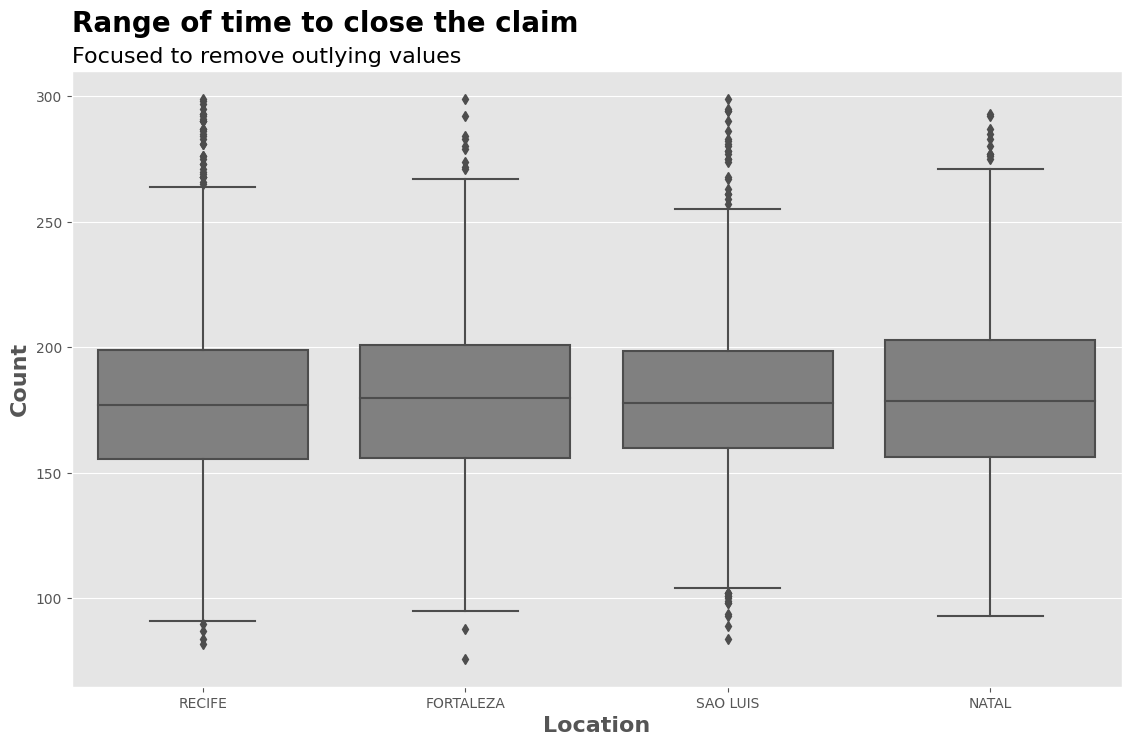

In [101]:
fig, axes = plt.subplots(figsize=(15,8))
sns.boxplot(x=df['location'],y=df[df['time_to_close']<300]['time_to_close'],ax=axes,color='gray')#.set(title='Count of claims per location')
plt.title('Range of time to close the claim', fontsize=20, fontweight='bold',y=1.05,loc='left')
#plt.suptitle('Most claims are processed in RECIFE', fontsize=16, y=0.91,ha='right')
#axes.set(xlabel='Location',fontsize=20, fontweight='bold')
plt.text(0.2, 0.89, 'Focused to remove outlying values', fontsize=16, transform=plt.gcf().transFigure)
plt.xlabel('Location', fontweight='bold',fontsize=16)
plt.ylabel('Count', fontweight='bold',fontsize=16)
#plt.suptitle('Subtitle: Data Trends', fontsize=12)
plt.subplots_adjust(left=0.2)
plt.show();

Based on all of the above, we would conclude that despite the fact that RECIFE and SAO LUIS offices process a higher number of claims, most claims are closed in the same range of days regardless of location.

The team should also consider rebalancing claims processed across all offices so that we can further analyze whether an increasing in claims processed at FORTALEZA and NATAL offices or a decreasing in claims processed at RECIFE and SAO LUIS would affect the time taken to close the claims. 